In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

np.random.seed(0)

### Perceptron Model

In [ ]:
class Perceptron(object):
    """
    Perceptron classifier.
    
    Parameters
    ----------
    num_features : int
        Number of features in the input data.
    lr : float, optional (default=1)
        Learning rate.
    epochs : int, optional (default=100)
        Number of epochs for training.
    
    Attributes
    ----------
    weights : ndarray of shape (num_features, 1)
        Weights after fitting.
    bias : ndarray of shape (1,)
        Bias after fitting.
    
    Methods
    -------
    activation_fn(z)
        Applies the activation function on the input z.
    forward(X)
        Computes the linear output and applies the activation function.
    backward(X, y)
        Computes the error between the predicted and actual values.
    train(X, y)
        Trains the perceptron on the given data.
    predict(X)
        Predicts the class labels for the given data.
    evaluate(X, y)
        Evaluates the accuracy of the perceptron on the given data.
    get_weights()
        Returns the weights and bias of the perceptron.
    set_weights(weights, bias)
        Sets the weights and bias of the perceptron.
    """
    
    def __init__(self, num_features, lr=1, epochs=100):
        self.num_features = num_features
        self.lr = lr
        self.epochs = epochs
        self.weights = np.zeros((num_features, 1), dtype=np.float64)
        self.bias = np.zeros(1, dtype=np.float64)

    def activation_fn(self, z):
        return (z >= 0).astype(np.int32)
    
    def forward(self, X):
        linear_output = np.dot(X, self.weights) + self.bias
        predictions = self.activation_fn(linear_output)
        return predictions.reshape(-1)
    
    def backward(self, X, y):
        y_hat = self.forward(X)
        errors = y - y_hat
        return errors
    
    def train(self, X, y, epochs=None, lr=None):
        epochs = epochs if epochs is not None else self.epochs
        lr = lr if lr is not None else self.lr
        
        for epoch in range(self.epochs):
            errors_sum = 0
            for i in range(y.shape[0]):
                errors = self.backward(X[i].reshape(1, self.num_features), y[i])
                self.weights += self.lr * errors * X[i].reshape(self.num_features, 1)
                self.bias += self.lr * errors
                errors_sum += np.abs(errors).sum()
            
            print(f'Epoch {epoch + 1}, Total Error: {errors_sum}')
            
            # Optional: stop early if convergence is achieved
            if errors_sum == 0:
                print(f"Convergence achieved at epoch {epoch + 1}")
                break


    def predict(self, X):
        return self.forward(X)
    
    def evaluate(self, X, y):
        predictions = self.predict(X)
        accuracy = np.mean(predictions == y)
        return accuracy
    
    def get_weights(self):
        print('Weights:\n', self.weights)
        print('\nBias:\n', self.bias)
        return self.weights, self.bias
    
    def set_weights(self, weights, bias):
        self.weights = weights
        self.bias = bias


### AND, OR, XOR model

In [3]:
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y_and = np.array([0, 0, 0, 1])
y_or = np.array([0, 1, 1, 1])
y_xor = np.array([0, 1, 1, 0])

In [ ]:
model = Perceptron(num_features=2, lr=0.01, epochs=100)

In [ ]:
model.train(X, y_or)

Epoch 1, Total Error: 2
Epoch 2, Total Error: 2
Epoch 3, Total Error: 1
Epoch 4, Total Error: 0
Convergence achieved at epoch 4


In [ ]:
print('Model parameters:\n\n')
print('  Weights: %s\n' % model.weights)
print('  Bias: %s\n' % model.bias)

Model parameters:


  Weights: [[0.01]
 [0.01]]

  Bias: [-0.01]



### Training on dataset

In [7]:
##########################
### DATASET
##########################

data = np.genfromtxt('perceptron_toydata.txt', delimiter='\t')
X, y = data[:, :2], data[:, 2]
y = y.astype(np.int64)

print('Class label counts:', np.bincount(y))
print('X.shape:', X.shape)
print('y.shape:', y.shape)

# Shuffling & train/test split
shuffle_idx = np.arange(y.shape[0])
shuffle_rng = np.random.RandomState(123)
shuffle_rng.shuffle(shuffle_idx)
X, y = X[shuffle_idx], y[shuffle_idx]

X_train, X_test = X[shuffle_idx[:70]], X[shuffle_idx[70:]]
y_train, y_test = y[shuffle_idx[:70]], y[shuffle_idx[70:]]

# Normalize (mean zero, unit variance)
mu, sigma = X_train.mean(axis=0), X_train.std(axis=0)
X_train = (X_train - mu) / sigma
X_test = (X_test - mu) / sigma

Class label counts: [50 50]
X.shape: (100, 2)
y.shape: (100,)


In [ ]:
ppn = Perceptron(num_features=2, lr=1, epochs=1000)

ppn.train(X_train, y_train)

print('Model parameters:\n\n')
print('  Weights: %s\n' % ppn.weights)
print('  Bias: %s\n' % ppn.bias)

Epoch 1, Total Error: 3
Epoch 2, Total Error: 0
Convergence achieved at epoch 2
Model parameters:


  Weights: [[2.02931895]
 [0.59329761]]

  Bias: [-1.]



In [9]:
train_acc = ppn.evaluate(X_train, y_train)
print('Train set accuracy: %.2f%%' % (train_acc*100))

test_acc = ppn.evaluate(X_test, y_test)
print('Test set accuracy: %.2f%%' % (test_acc*100))

Train set accuracy: 100.00%
Test set accuracy: 100.00%


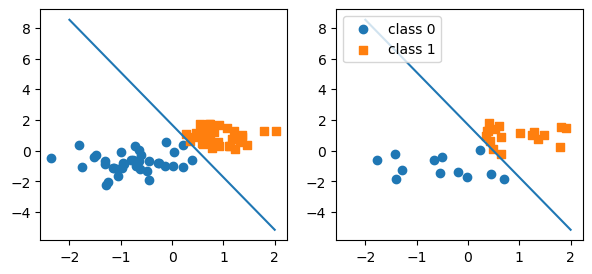

In [10]:
##########################
### 2D Decision Boundary
##########################

w, b = ppn.weights, ppn.bias

x0_min = -2
x1_min = ( (-(w[0] * x0_min) - b[0]) 
          / w[1] )

x0_max = 2
x1_max = ( (-(w[0] * x0_max) - b[0]) 
          / w[1] )

# x0*w0 + x1*w1 + b = 0
# x1  = (-x0*w0 - b) / w1


fig, ax = plt.subplots(1, 2, sharex=True, figsize=(7, 3))

ax[0].plot([x0_min, x0_max], [x1_min, x1_max])
ax[0].scatter(X_train[y_train==0, 0], X_train[y_train==0, 1], label='class 0', marker='o')
ax[0].scatter(X_train[y_train==1, 0], X_train[y_train==1, 1], label='class 1', marker='s')

ax[1].plot([x0_min, x0_max], [x1_min, x1_max])
ax[1].scatter(X_test[y_test==0, 0], X_test[y_test==0, 1], label='class 0', marker='o')
ax[1].scatter(X_test[y_test==1, 0], X_test[y_test==1, 1], label='class 1', marker='s')

ax[1].legend(loc='upper left')
plt.show()